### Import libraries and Data

In [1]:
!pip install pydataset shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 1.2 MB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 876.8 kB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01
Using legacy 'setup.py install' for pydataset, since package 'wheel' is not installed.
  Running setup.py install for pydataset ... done


In [2]:
from pydataset import data
import pandas as pd

initiated datasets repo at: /home/johnadi/.pydataset/


In [6]:
df = data('Housing')
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


### Data Preparation

In [7]:
# dummy variable
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
1,42000.0,5850,3,1,2,1,1,0,1,0,0,0
2,38500.0,4000,2,1,1,0,1,0,0,0,0,0
3,49500.0,3060,3,1,1,0,1,0,0,0,0,0
4,60500.0,6650,3,1,2,0,1,1,0,0,0,0
5,61000.0,6360,2,1,1,0,1,0,0,0,0,0


In [8]:
# isolate X and y
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [9]:
# Create train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1502)
X_train.head()

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
139,2990,2,1,1,1,0,0,0,0,0,0
80,6360,2,1,1,1,1,0,1,0,1,0
526,7475,3,2,4,2,1,0,0,0,1,0
362,8580,4,3,4,2,1,0,0,0,1,1
276,5680,3,1,2,1,1,1,0,0,1,0


### Random Forest 

In [11]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 20, random_state=1502)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=1502)

### SHAP Global Interpretability

In [12]:
import shap
explainer = shap.TreeExplainer(model)

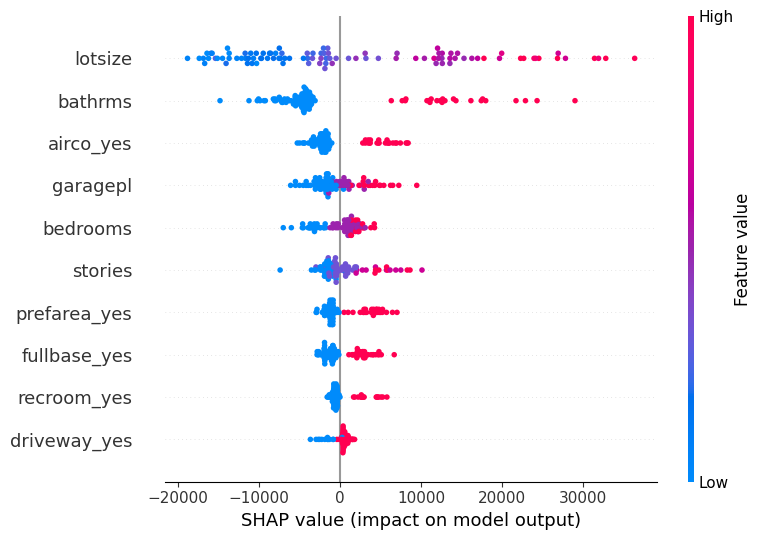

In [13]:
# Global interpretability
sample = X_test.sample(100)
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values, sample, max_display=10)